Assignment 13
Title: Diabetes Prediction using K-Nearest Neighbors (KNN) Algorithm

✅ Dataset Loaded Successfully!

Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values per Column:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Feature Shape: (768, 8)
Target Shape: (768,)

Training Set Shape: (614, 

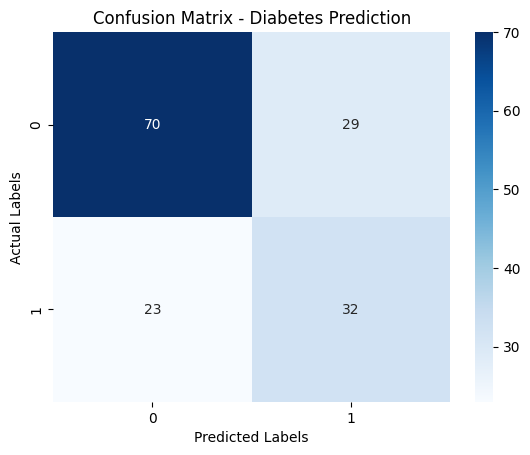


Model Performance:
------------------
Accuracy: 0.6623
Error Rate: 0.3377
Precision: 0.5246
Recall: 0.5818


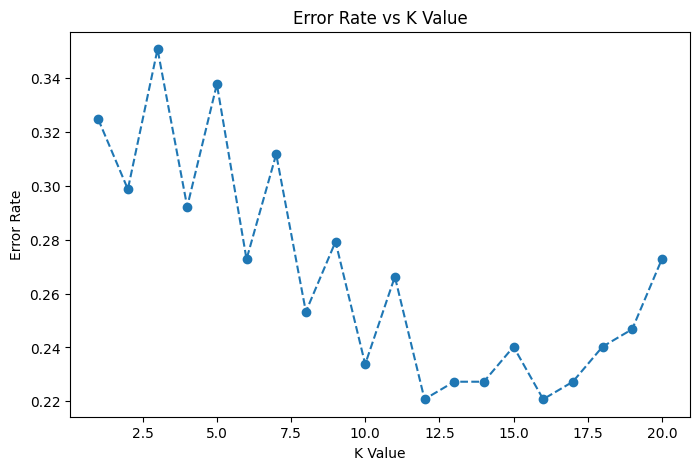


✅ Practical Completed Successfully!


In [1]:
# ================================================================
# 🧪 Practical 13
# Title: Diabetes Prediction using K-Nearest Neighbors (KNN) Algorithm
# ================================================================

# ------------------------------------------------
# 1. Import Required Libraries
# ------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

# ------------------------------------------------
# 2. Load the Dataset
# ------------------------------------------------
df = pd.read_csv("diabetes.csv")   # Ensure the file is in your working directory
print("✅ Dataset Loaded Successfully!")
df.head()

# ------------------------------------------------
# 3. Explore Dataset
# ------------------------------------------------
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())

# ------------------------------------------------
# 4. Split Dataset into Features and Target
# ------------------------------------------------
X = df.drop("Outcome", axis=1)  # Features
y = df["Outcome"]               # Target variable

print("\nFeature Shape:", X.shape)
print("Target Shape:", y.shape)

# ------------------------------------------------
# 5. Train-Test Split
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

# ------------------------------------------------
# 6. Train the K-Nearest Neighbors Model
# ------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\n✅ Model Trained Successfully!")

# ------------------------------------------------
# 7. Make Predictions
# ------------------------------------------------
y_pred = knn.predict(X_test)
print("\nFirst 10 Predictions:", y_pred[:10])

# ------------------------------------------------
# 8. Confusion Matrix Visualization
# ------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Diabetes Prediction")
plt.show()

# ------------------------------------------------
# 9. Accuracy and Error Rate
# ------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print("\nModel Performance:")
print("------------------")
print("Accuracy:", round(accuracy, 4))
print("Error Rate:", round(error_rate, 4))

# ------------------------------------------------
# 10. Precision and Recall
# ------------------------------------------------
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

# ------------------------------------------------
# 11. (Optional) Visualize Error Rate vs K Value
# ------------------------------------------------
error_rates = []
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred_k = knn_temp.predict(X_test)
    error_rates.append(np.mean(y_pred_k != y_test))

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='dashed')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

print("\n✅ Practical Completed Successfully!")
